In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle

In [27]:
df=pd.read_csv("USA_Housing.csv")

In [28]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [29]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [30]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [31]:
df=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]

In [32]:
df=df.rename(columns={'Avg. Area Income':"Income",
                    'Avg. Area House Age':"House_age",
                      'Avg. Area Number of Rooms':'Number_of_rooms',
                      'Avg. Area Number of Bedrooms':'Number_of_bedrooms',
                      'Area Population':'Population'
                      
})

In [33]:
df.head()

,Income,House_age,Number_of_rooms,Number_of_bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Income              5000 non-null   float64
 1   House_age           5000 non-null   float64
 2   Number_of_rooms     5000 non-null   float64
 3   Number_of_bedrooms  5000 non-null   float64
 4   Population          5000 non-null   float64
 5   Price               5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


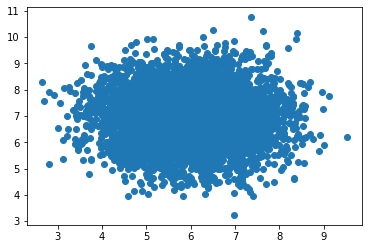

In [35]:
plt.scatter(df["House_age"],df['Number_of_rooms'])
plt.show()

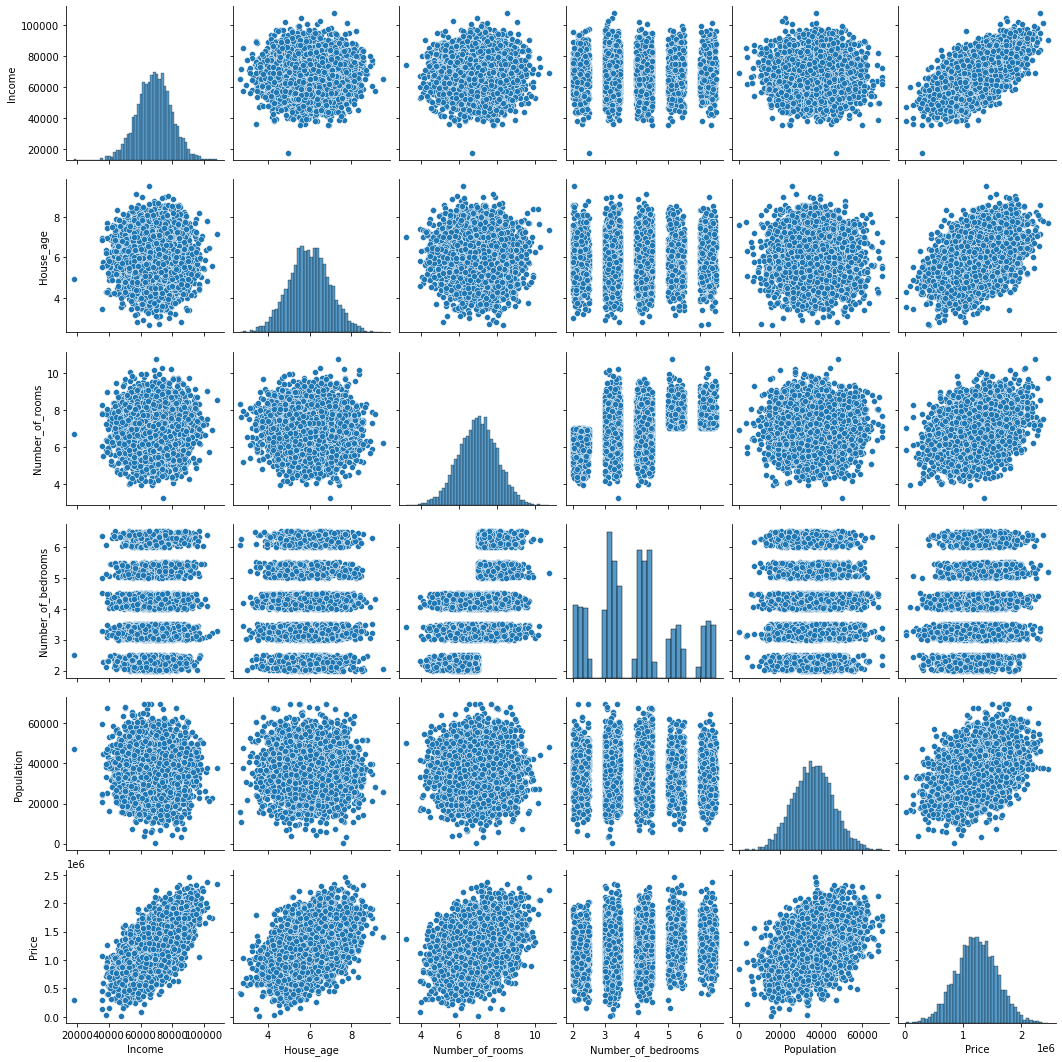

In [36]:
sns.pairplot(df)

/Users/sudhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House_age', ylabel='Density'>

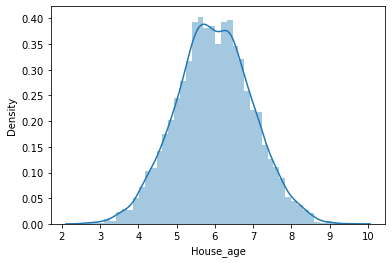

In [37]:
sns.distplot(df['House_age'])

/Users/sudhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

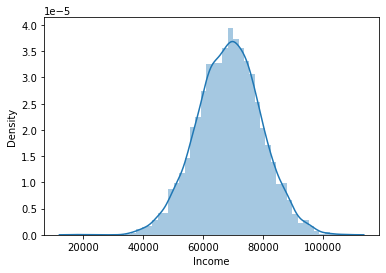

In [38]:
sns.distplot(df['Income'])

In [39]:
df.columns

Index(['Income', 'House_age', 'Number_of_rooms', 'Number_of_bedrooms',
       'Population', 'Price'],
      dtype='object')

In [40]:
X=df[['Income', 'House_age', 'Number_of_rooms', 'Number_of_bedrooms',
       'Population']]
Y=df[['Price']]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=20,train_size=0.8)

In [42]:
x_train.shape

(4000, 5)

In [43]:
x_test.shape

(1000, 5)

# y=mx+c
## y= Dependent Variable
## m= Slope
## x= Independent Variable
## c= intercept

In [44]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [45]:
predata=pd.DataFrame(prediction, columns=["Prediction"])


In [52]:
model.coef_

array([[2.16070016e+01, 1.65591958e+05, 1.21359252e+05, 2.04235317e+03,
        1.53035116e+01]])

In [53]:
x_train.columns

Index(['Income', 'House_age', 'Number_of_rooms', 'Number_of_bedrooms',
       'Population'],
      dtype='object')

In [54]:
model.intercept_

array([-2649809.96731862])

In [60]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,prediction)

0.9108527429137241

In [69]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [73]:
x_test.mean()

Income                68056.151870
House_age                 5.925451
Number_of_rooms           6.983471
Number_of_bedrooms        3.956140
Population            36256.904940
dtype: float64

In [103]:
Income=float(input("Please Enter a Average income of people Eg. 68056"))
House_age=float(input("please Enter the average house age...."))
Number_of_rooms=float(input("please Enter Number of Rooms"))
Number_of_bedrooms=float(input("Please Enter Number of Bedrooms....."))
Population=float(input("Please Enter the population of the area Eg. 36256"))
predict_data={"income":Income,
                     "House_age":House_age,
                     "Number_of_rooms":Number_of_rooms,
                     'Number_of_bedrooms':Number_of_bedrooms,
                     "Polulation":Population}


Please Enter a Average income of people Eg. 6805683953.104839
please Enter the average house age....7.385135
please Enter Number of Rooms7.385135
Please Enter Number of Bedrooms.....3.80
Please Enter the population of the area Eg. 3625637283.357646


In [105]:
predict_data=pd.DataFrame(predict_data,index=[0])
predict_data

,income,House_age,Number_of_rooms,Number_of_bedrooms,Polulation
0,83953.104839,7.385135,7.385135,3.8,37283.357646


In [106]:
model.predict(predict_data)

array([[1861665.55955104]])

In [110]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [111]:
loaded_model = pickle.load(open(filename, 'rb'))

In [112]:
loaded_model.predict(predict_data)

array([[1861665.55955104]])